Missing values in the dataset:
 symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


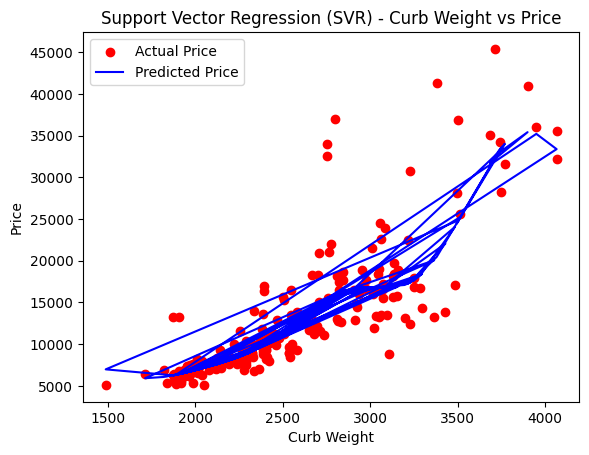

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

# Step 1: Load Data
data = pd.read_csv('Automobile_data.csv')

# Step 2: Data Cleaning
# Replace '?' with NaN for easier processing
data.replace('?', np.nan, inplace=True)

# Check for missing values in the relevant columns
print("Missing values in the dataset:\n", data.isnull().sum())

# Replace missing values with the mean (you can also choose median or other strategies)
imputer = SimpleImputer(strategy='mean')
data[['curb-weight', 'price']] = imputer.fit_transform(data[['curb-weight', 'price']])

# Ensure the columns are numeric
data['curb-weight'] = pd.to_numeric(data['curb-weight'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Step 3: Extract the independent and dependent variables
X = data[['curb-weight']].values  # Independent variable
y = data['price'].values         # Dependent variable (price)

# Step 4: Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

# Scale the features and target
X_scaled = sc_X.fit_transform(X)
y_scaled = np.squeeze(sc_y.fit_transform(y.reshape(-1, 1)))  # Reshaping y to avoid warnings

# Step 5: Fit SVR Model
regressor = SVR(kernel='rbf')  # Radial Basis Function (RBF) Kernel
regressor.fit(X_scaled, y_scaled)

# Step 6: Predict with SVR
y_pred_scaled = regressor.predict(X_scaled)

# Inverse transform to get predictions in the original scale
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Step 7: Visualize Results
# Scatter plot of actual values
plt.scatter(X, y, color='red', label='Actual Price')

# Plot the predicted values
plt.plot(X, y_pred, color='blue', label='Predicted Price')

# Labels and title
plt.title('Support Vector Regression (SVR) - Curb Weight vs Price')
plt.xlabel('Curb Weight')
plt.ylabel('Price')
plt.legend()

plt.show()


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

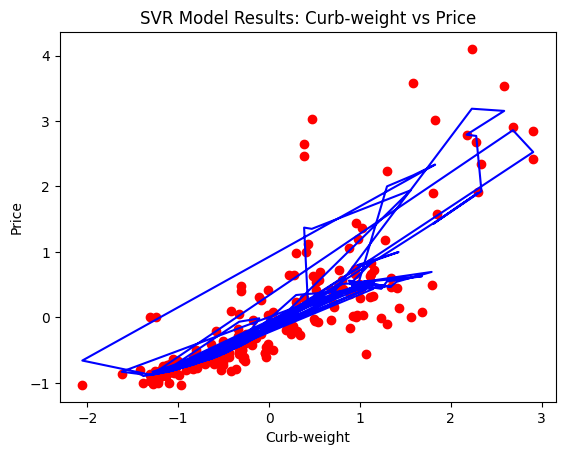

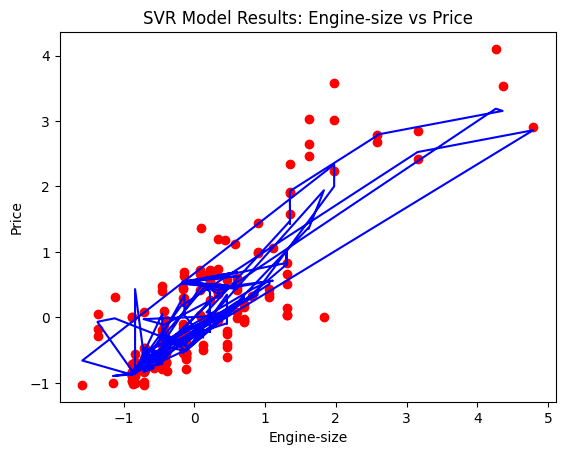

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (ensure the dataset is in the current directory)
dataset = pd.read_csv("/content/Automobile_data.csv")

# Preview the first few rows of the dataset to understand its structure
print(dataset.head())

# --- Data Preprocessing ---
# We need to handle missing values and encode categorical variables first
# For simplicity, let's work with a few numeric columns: 'curb-weight' and 'engine-size' for feature extraction
# The target variable will be 'price'

# Clean data: Convert non-numeric values to NaN, and then fill missing values
dataset['curb-weight'] = pd.to_numeric(dataset['curb-weight'], errors='coerce')
dataset['engine-size'] = pd.to_numeric(dataset['engine-size'], errors='coerce')
dataset['price'] = pd.to_numeric(dataset['price'], errors='coerce')

# Fill missing values with mean (for numeric columns)
dataset['curb-weight'].fillna(dataset['curb-weight'].mean(), inplace=True)
dataset['engine-size'].fillna(dataset['engine-size'].mean(), inplace=True)
dataset['price'].fillna(dataset['price'].mean(), inplace=True)

# Select the features (independent variables) and the target (dependent variable)
X = dataset[['curb-weight', 'engine-size']].values  # Features: 'curb-weight', 'engine-size'
y = dataset['price'].values  # Target: 'price'

# --- Feature Scaling ---
# Standardize the features and the target variable
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

# --- Train SVR Model ---
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())  # Train the SVR model

# Predict a new result (inverse transform the prediction to get original scale)
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[2000, 160]])).reshape(-1, 1))

print(f"Predicted Price for car with curb-weight 2000 and engine-size 160: {y_pred[0][0]}")

# --- Model Accuracy (R^2 Score) ---
accuracy = regressor.score(X, y)  # This gives the R^2 score
print('Accuracy (R^2 Score) of the model is', accuracy * 100, '%')

# --- Visualize the Results ---
# Visualize the SVR model results for 'curb-weight' vs 'price'
plt.scatter(X[:, 0], y, color="red")  # 'curb-weight' vs 'price'
plt.plot(X[:, 0], regressor.predict(X), color="blue")  # SVR predicted line
plt.title("SVR Model Results: Curb-weight vs Price")
plt.xlabel("Curb-weight")
plt.ylabel("Price")
plt.show()

# Visualize the SVR model results for 'engine-size' vs 'price'
plt.scatter(X[:, 1], y, color="red")  # 'engine-size' vs 'price'
plt.plot(X[:, 1], regressor.predict(X), color="blue")  # SVR predicted line
plt.title("SVR Model Results: Engine-size vs Price")
plt.xlabel("Engine-size")
plt.ylabel("Price")
plt.show()
